<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Anova_On_Steroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as stat
import scipy.stats as stats

In [2]:
#one way anova is categorical to numeric relationships
df = pd.read_csv("http://ishelp.info/data/bikebuyers.csv")

In [3]:
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [6]:
d_types = {col : [df[col].dtype, df[col].nunique()] for col in df.columns}

In [7]:
d_types

{'ID': [dtype('int64'), 1000],
 'Marital Status': [dtype('O'), 2],
 'Gender': [dtype('O'), 2],
 'MaritalStatusNumeric': [dtype('int64'), 2],
 'GenderNumeric': [dtype('int64'), 2],
 'Income': [dtype('int64'), 16],
 'Children': [dtype('int64'), 6],
 'EducationNumeric': [dtype('int64'), 5],
 'CommuteDistanceNumeric': [dtype('int64'), 5],
 'Cars': [dtype('int64'), 5],
 'Age': [dtype('int64'), 53],
 'HomeOwnerNumeric': [dtype('int64'), 2],
 'PurchaseBikeNumeric': [dtype('int64'), 2],
 'Education': [dtype('O'), 5],
 'Occupation': [dtype('O'), 5],
 'Home Owner': [dtype('O'), 2],
 'Commute Distance': [dtype('O'), 5],
 'Region': [dtype('O'), 3],
 'Purchased Bike': [dtype('O'), 2]}

In [12]:
categorical_data_types = [col for col in df.columns if df[col].dtype == "object"]

In [14]:
categorical_details = {col : df[col].unique() for col in categorical_data_types}

In [15]:
categorical_details

{'Marital Status': array(['Married', 'Single'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Education': array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
        'Partial High School'], dtype=object),
 'Occupation': array(['Professional', 'Skilled Manual', 'Management', 'Clerical',
        'Manual'], dtype=object),
 'Home Owner': array(['No', 'Yes'], dtype=object),
 'Commute Distance': array(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'],
       dtype=object),
 'Region': array(['North America', 'Europe', 'Pacific'], dtype=object),
 'Purchased Bike': array(['No', 'Yes'], dtype=object)}

Text(6.042874999999997, 0.5, 'Density')

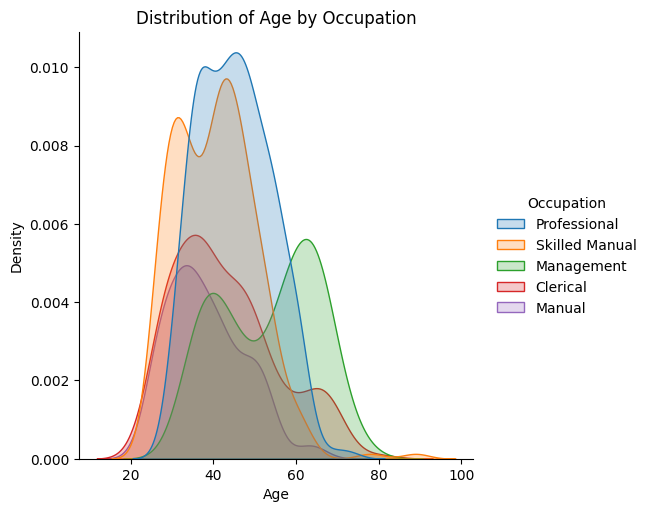

In [19]:
sns.displot(df, x='Age', hue='Occupation', kind='kde', fill=True)
plt.title("Distribution of Age by Occupation")
plt.xlabel("Age")
plt.ylabel("Density")

In [22]:
#number of married people that bought bikes

married = df[df["Marital Status"] == "Married"]
single = df[df["Marital Status"] == "Single"]

In [23]:
married_purchased = married[married["Purchased Bike"] == "Yes"]
single_purchased = single[single["Purchased Bike"] == "Yes"]

married_not_purchased = married[married["Purchased Bike"] == "No"]
single_not_purchased = single[single["Purchased Bike"] == "No"]

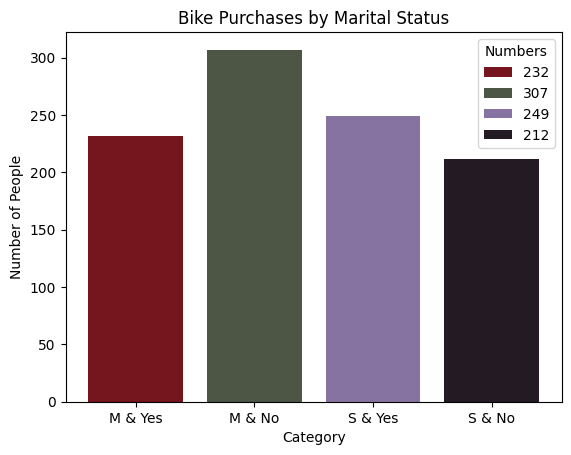

[232, 307, 249, 212]

In [40]:
list_of_married = [married_purchased, married_not_purchased]
list_of_single = [single_purchased, single_not_purchased]

purchased = ["M & Yes", "M & No", "S & Yes", "S & No"]
comprehensive_list = [len(i) for i in list_of_married] + [len(j) for j in list_of_single]
colors = ['#75151E', '#4D5645', "#8673A1", "#231A24"]

# Add labels directly inside plt.bar
plt.bar(purchased, comprehensive_list, color=colors, label=purchased)

# Create the legend
plt.legend(labels=comprehensive_list, title="Numbers")

plt.title("Bike Purchases by Marital Status")
plt.xlabel("Category")
plt.ylabel("Number of People")
plt.show()

comprehensive_list


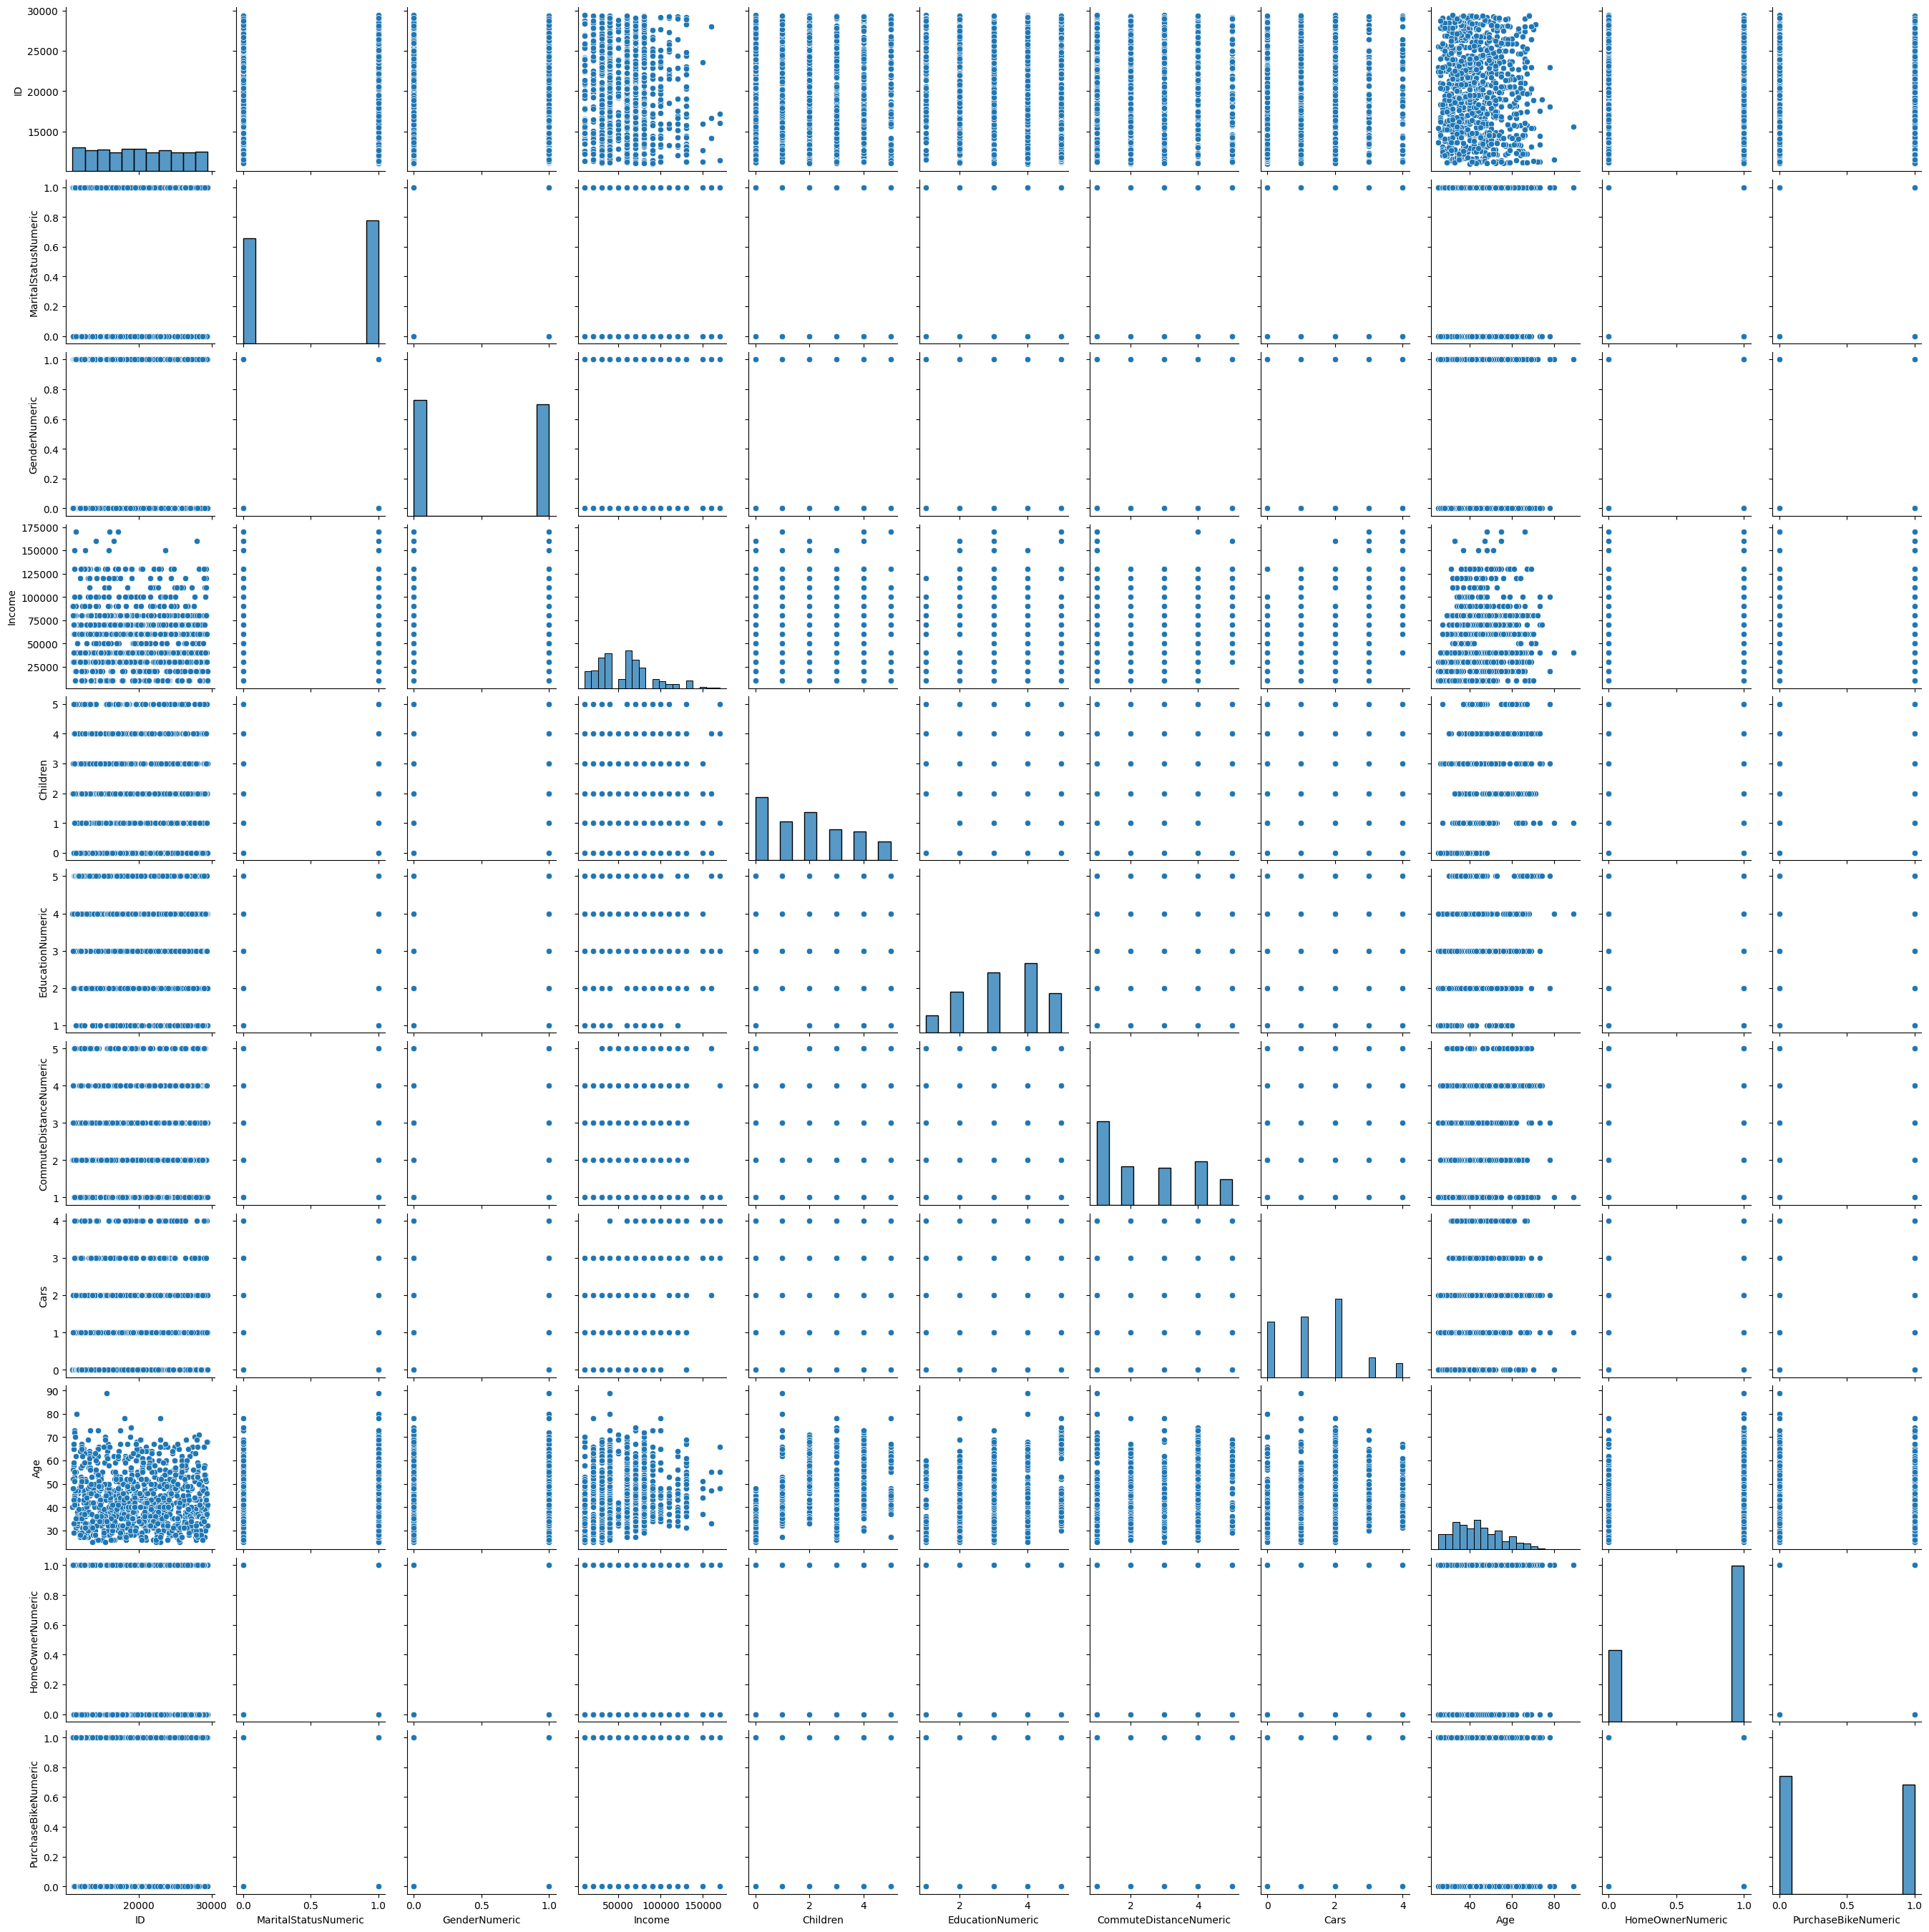

In [46]:
sns.pairplot(df)

Text(5.069444444444445, 0.5, 'Density')

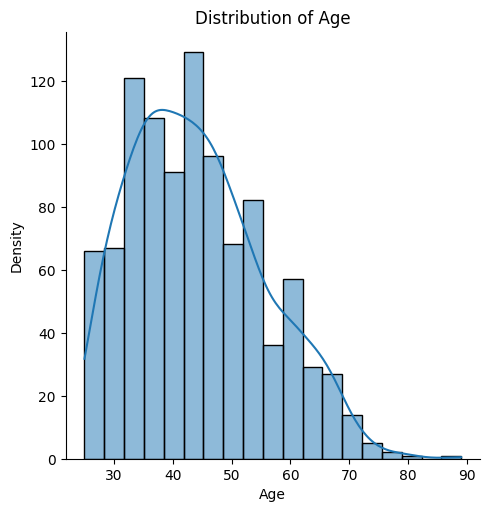

In [49]:
sns.displot(data=df['Age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")

/tmp/ipython-input-3174322082.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=True)


Text(0, 0.5, 'Density')

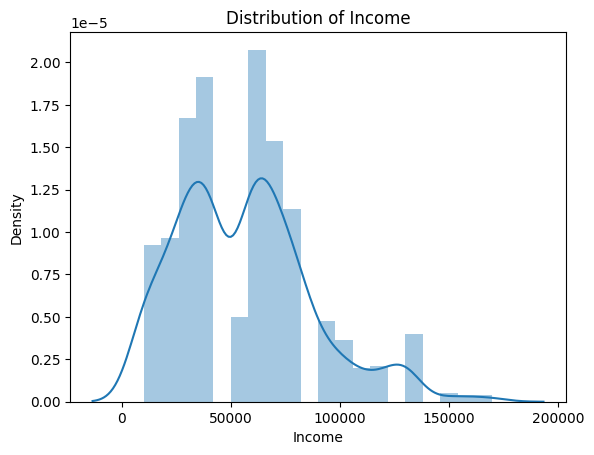

In [50]:
sns.distplot(df['Income'], kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Density")

/tmp/ipython-input-1822801661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Children'], kde=True)


Text(0, 0.5, 'Density')

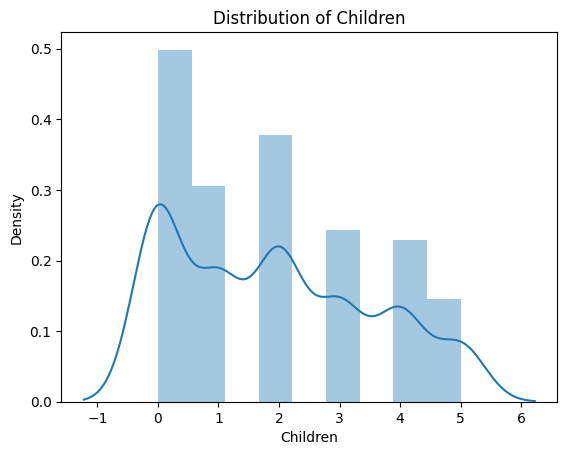

In [51]:
sns.distplot(df['Children'], kde=True)
plt.title("Distribution of Children")
plt.xlabel("Children")
plt.ylabel("Density")

In [55]:
no_children = df[df["Children"] == 0]

Text(0.5, 9.444444444444438, 'Age')

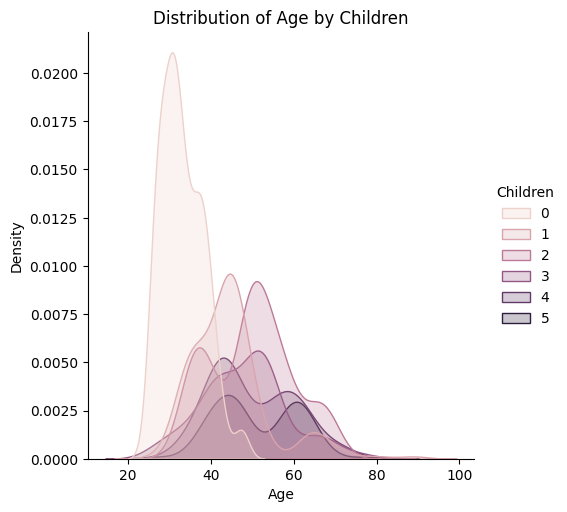

In [58]:
sns.displot(x=df['Age'], hue=df['Children'], kind='kde', fill=True)
plt.title("Distribution of Age by Children")
plt.xlabel("Age")

In [60]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

Text(0.5, 9.444444444444438, 'Age')

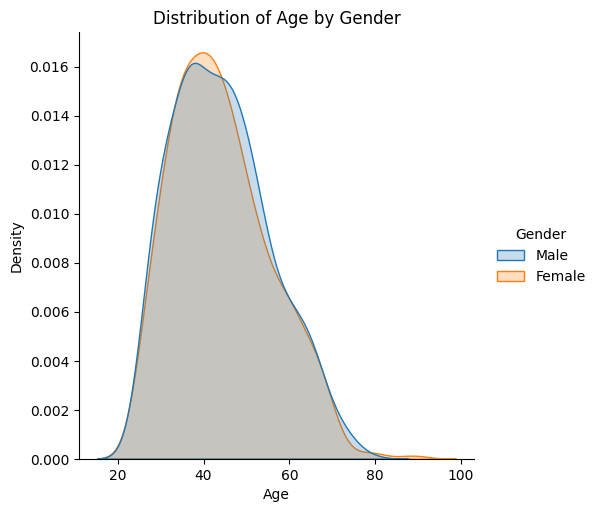

In [61]:
sns.displot(x=df['Age'], hue=df['Gender'], kind='kde', fill=True)
plt.title("Distribution of Age by Gender")
plt.xlabel("Age")

Text(0.5, 9.444444444444438, 'Age')

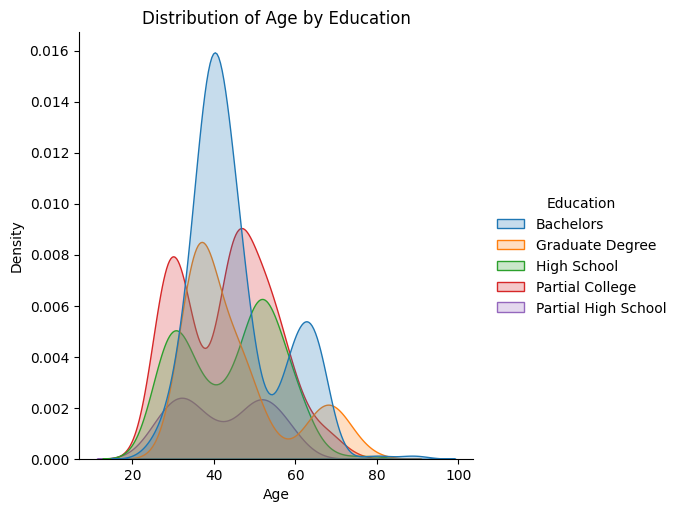

In [62]:
sns.displot(x=df['Age'], hue=df['Education'], kind='kde', fill=True)
plt.title("Distribution of Age by Education")
plt.xlabel("Age")

In [63]:
bike_purchase_by_education = df.groupby("Education")["Purchased Bike"].value_counts()

Text(0.5, 9.444444444444438, 'Age')

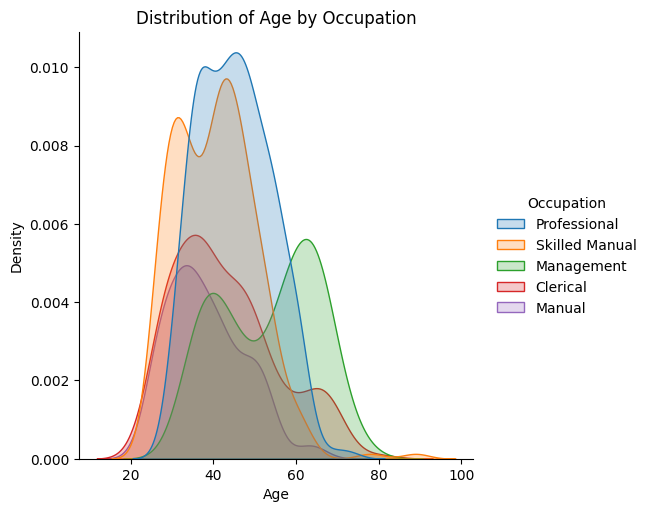

In [68]:
sns.displot(x=df['Age'], hue=df['Occupation'], kind='kde', fill=True)
plt.title("Distribution of Age by Occupation")
plt.xlabel("Age")

In [66]:
df['Occupation'].nunique()

5

In [67]:
set(df['Occupation'])

{'Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'}

In [69]:
purchased_bike = df[df["Purchased Bike"] == "Yes"]
did_not_purchase_bike = df[df["Purchased Bike"] == "No"]

Text(0.5, 9.444444444444438, 'Age')

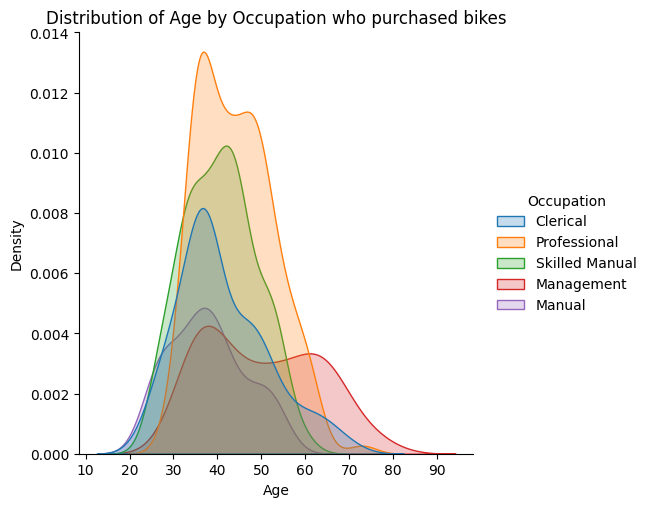

In [70]:
sns.displot(purchased_bike, x=purchased_bike['Age'], hue=purchased_bike['Occupation'], kind='kde', fill=True)
plt.title("Distribution of Age by Occupation who purchased bikes")
plt.xlabel("Age")

Text(0.5, 9.444444444444438, 'Age')

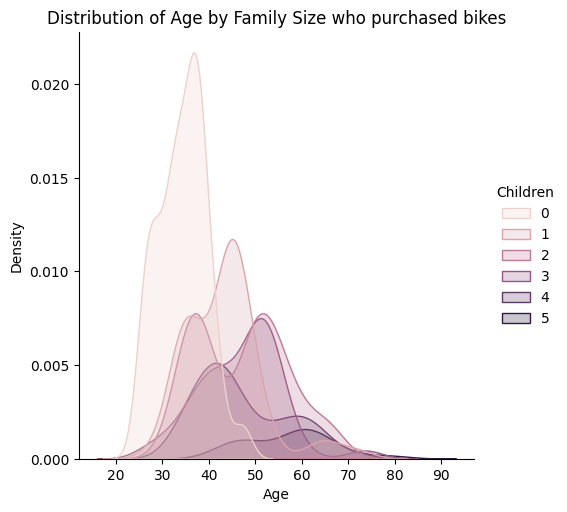

In [71]:
sns.displot(purchased_bike, x=purchased_bike['Age'], hue=purchased_bike['Children'], kind='kde', fill=True)
plt.title("Distribution of Age by Family Size who purchased bikes")
plt.xlabel("Age")

Text(0, 0.5, 'Number of People')

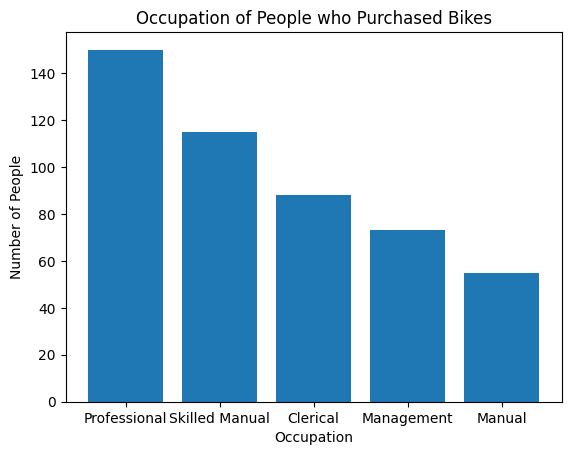

In [73]:
plt.bar(purchased_bike['Occupation'].value_counts().index, purchased_bike['Occupation'].value_counts().values)
plt.title("Occupation of People who Purchased Bikes")
plt.xlabel("Occupation")
plt.ylabel("Number of People")

Text(0.5, 0, 'Occupation')

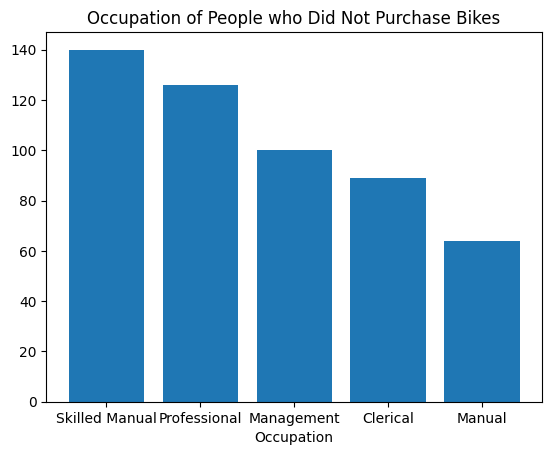

In [74]:
plt.bar(did_not_purchase_bike['Occupation'].value_counts().index, did_not_purchase_bike['Occupation'].value_counts().values)
plt.title("Occupation of People who Did Not Purchase Bikes")
plt.xlabel("Occupation")

In [76]:
distribution_by_occupation = df.groupby("Occupation")["Purchased Bike"].value_counts()
distribution_by_occupation

Occupation      Purchased Bike
Clerical        No                 89
                Yes                88
Management      No                100
                Yes                73
Manual          No                 64
                Yes                55
Professional    Yes               150
                No                126
Skilled Manual  No                140
                Yes               115
Name: count, dtype: int64

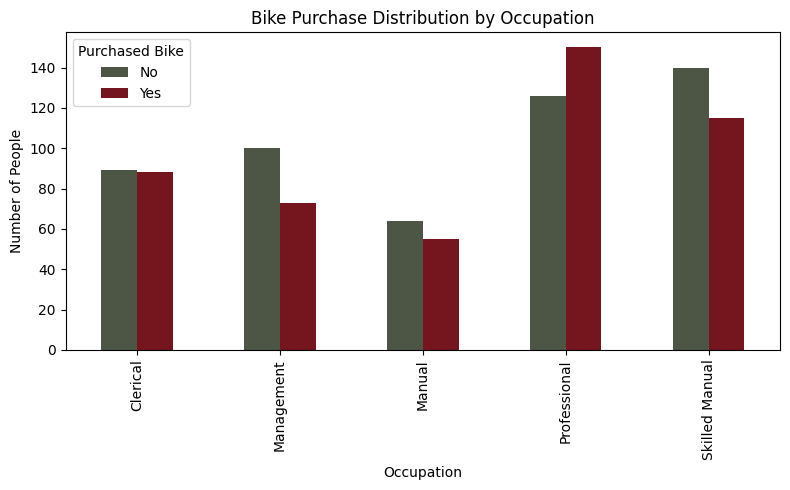

In [77]:
distribution_by_occupation = df.groupby("Occupation")["Purchased Bike"].value_counts().unstack()

distribution_by_occupation.plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    color=["#4D5645", "#75151E"]
)

plt.title("Bike Purchase Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Number of People")
plt.legend(title="Purchased Bike")
plt.tight_layout()
plt.show()


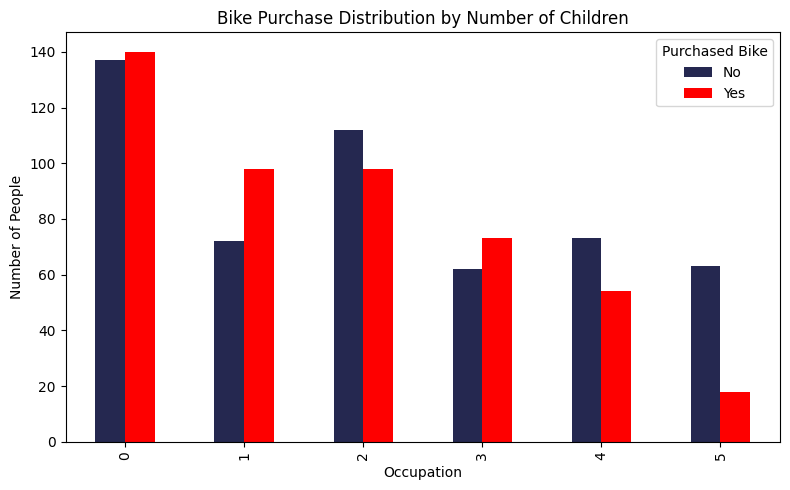

In [84]:
purchased_by_children = df.groupby('Children')["Purchased Bike"].value_counts().unstack()
purchased_by_children.plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    color=["#252850", "#FE0000"]
)

plt.title("Bike Purchase Distribution by Number of Children")
plt.xlabel("Occupation")
plt.ylabel("Number of People")
plt.legend(title="Purchased Bike")
plt.tight_layout()
plt.show()

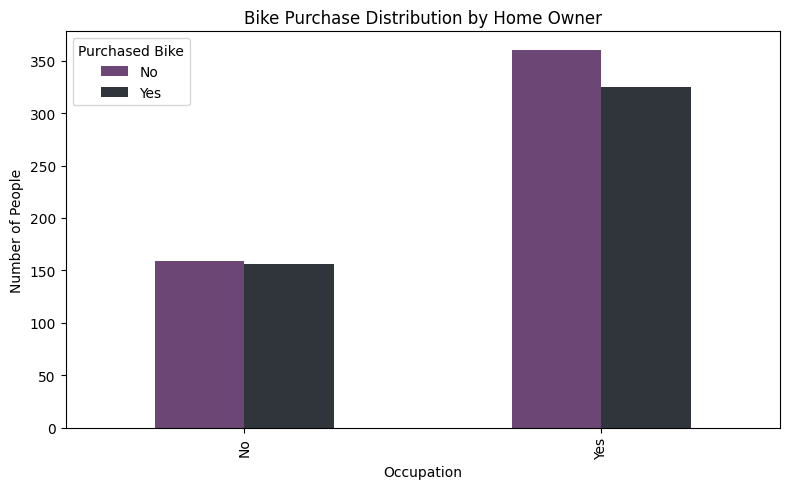

In [88]:
purchased_by_home_owner = df.groupby('Home Owner')["Purchased Bike"].value_counts().unstack()
purchased_by_home_owner.plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    color=["#6C4675", "#2F353B"]
)

plt.title("Bike Purchase Distribution by Home Owner")
plt.xlabel("Occupation")
plt.ylabel("Number of People")
plt.legend(title="Purchased Bike")
plt.tight_layout()
plt.show()